<a href="https://colab.research.google.com/github/Parth-nXp/pytorch_mini_project/blob/main/rice_type_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace = True)
data_df.drop(['id'], axis = 1, inplace = True)
print(data_df.shape)

(18185, 11)


In [ ]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
print(data_df["Class"].unique())

[1 0]


In [ ]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [ ]:
original_df = data_df.copy()
for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [ ]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype = torch.float32).to(device)


  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]


In [ ]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 32, shuffle = False)
testing_dataloader = DataLoader(testing_data, batch_size = 32, shuffle = False)

In [ ]:
for x, y in train_dataloader:
  print(x)
  print("=======")
  print(y)
  break

tensor([[0.5777, 0.8192, 0.6161, 0.9732, 0.5502, 0.7600, 0.5409, 0.6615, 0.7240,
         0.7544],
        [0.5723, 0.8075, 0.6235, 0.9698, 0.5445, 0.7565, 0.5569, 0.6520, 0.7383,
         0.7348],
        [0.5405, 0.7769, 0.6153, 0.9663, 0.5174, 0.7352, 0.5441, 0.6367, 0.7311,
         0.7163],
        [0.8730, 0.8665, 0.8783, 0.9202, 0.8326, 0.9343, 0.9019, 0.7496, 0.8521,
         0.5597],
        [0.6524, 0.8962, 0.6381, 0.9797, 0.6223, 0.8077, 0.5051, 0.7177, 0.6946,
         0.7968],
        [0.5506, 0.7927, 0.6137, 0.9694, 0.5254, 0.7420, 0.5859, 0.6404, 0.7363,
         0.7327],
        [0.8584, 0.8756, 0.8538, 0.9292, 0.8207, 0.9265, 0.6185, 0.7511, 0.8345,
         0.5818],
        [0.5351, 0.7051, 0.6578, 0.9385, 0.5065, 0.7315, 0.8289, 0.5917, 0.8381,
         0.6082]], device='cuda:0')
tensor([1., 1., 1., 0., 1., 1., 0., 1.], device='cuda:0')


In [ ]:
hidden_neurons = 10
class my_model(nn.Module):
  def __init__(self):
    super(my_model, self).__init__()

    self.input_layer =nn.Linear(X.shape[1], hidden_neurons)
    self.linear = nn.Linear(hidden_neurons, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x


model = my_model().to(device)

In [ ]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []

total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data
      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction, labels)
      total_loss_val += batch_loss.item()
      acc = ((prediction).round() == labels).sum().item()
      total_acc_val += acc
  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_validation_plot.append(round(total_loss_val/1000, 4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
  total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))

  print(f'''Epoch no. {epoch + 1} Train Loss: {round(total_loss_train/1000, 4)} Train Accuracy: {round(total_acc_train/training_data.__len__() * 100, 4)}%
            Validation Loss: {round(total_loss_val/1000, 4)} Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100, 4)}%''')
  print("="*25)


Epoch no. 1 Train Loss: 0.5866 Train Accuracy: 90.7063%
            Validation Loss: 0.0405 Validation Accuracy: 97.8006%
Epoch no. 2 Train Loss: 0.1245 Train Accuracy: 98.4838%
            Validation Loss: 0.0185 Validation Accuracy: 98.4238%
Epoch no. 3 Train Loss: 0.0823 Train Accuracy: 98.5073%
            Validation Loss: 0.0145 Validation Accuracy: 98.6437%
Epoch no. 4 Train Loss: 0.0729 Train Accuracy: 98.5859%
            Validation Loss: 0.0145 Validation Accuracy: 98.3504%
Epoch no. 5 Train Loss: 0.0706 Train Accuracy: 98.6173%
            Validation Loss: 0.0137 Validation Accuracy: 98.607%
Epoch no. 6 Train Loss: 0.0692 Train Accuracy: 98.5781%
            Validation Loss: 0.0128 Validation Accuracy: 98.4971%
Epoch no. 7 Train Loss: 0.0688 Train Accuracy: 98.6173%
            Validation Loss: 0.0124 Validation Accuracy: 98.607%
Epoch no. 8 Train Loss: 0.0678 Train Accuracy: 98.5859%
            Validation Loss: 0.0132 Validation Accuracy: 98.4604%
Epoch no. 9 Train Loss: 0.

In [62]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss_test = criterion(prediction, labels).item()
    total_loss_test += batch_loss_test
    acc_test = ((prediction).round() == labels).sum().item()
    total_acc_test += acc_test

print(f'Test Loss: {round(total_loss_test/1000, 4)} Test Accuracy: {round(total_acc_test/testing_data.__len__() * 100, 4)}%')

Test Loss: 0.014 Test Accuracy: 98.6804%


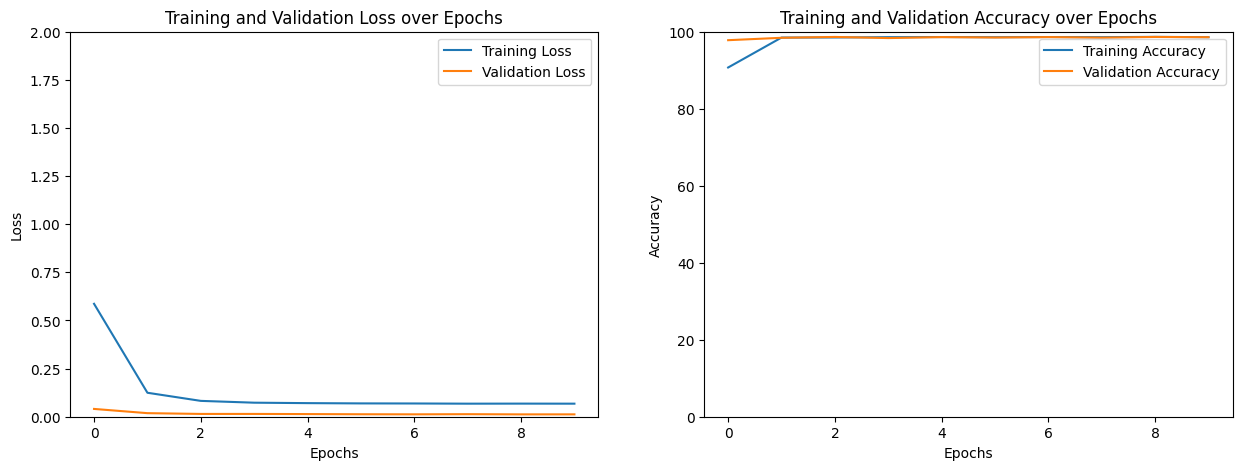

In [65]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axs[0].plot(total_loss_train_plot, label = 'Training Loss')
axs[0].plot(total_loss_validation_plot, label = 'Validation Loss')
axs[0].set_title("Training and Validation Loss over Epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = 'Training Accuracy')
axs[1].plot(total_acc_validation_plot, label = 'Validation Accuracy')
axs[1].set_title("Training and Validation Accuracy over Epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0,100])
axs[1].legend()


plt.show()